In [1]:
import pandas as pd
income = pd.read_csv('us_income.csv')

In [3]:
lowest_income_index = income['median_income'].idxmin()
lowest_income_index
lowest_income_county = income.loc[lowest_income_index]['county']
lowest_income_county

'Starr County, Texas'

In [4]:
high_population = income[income['pop_over_25'] > 500000]
high_population.shape[0]

lowest_income_high_pop_index = high_population['median_income'].idxmin()
lowest_income_high_pop_index
lowest_income_high_pop_county = high_population.loc[lowest_income_high_pop_index]['county']
lowest_income_high_pop_county

'Miami-Dade County, Florida'

In [5]:
import random

# Returns a random integer between the numbers 0 and 10, inclusive.
num = random.randint(0, 10)

# Generate a sequence of 10 random numbers between the values of 0 and 10.
random_sequence = [random.randint(0, 10) for _ in range(10)]

# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# An example is when you use random numbers to select a subset of the data, and you want other people
# looking at the same data to get the same subset.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])
random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])
random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

random.seed(20)
new_sequence = [random.randint(0,10) for _ in range(10)]
new_sequence

[9, 0, 6, 7, 9]
[9, 0, 6, 7, 9]
[7, 8, 7, 7, 8]


[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]

In [7]:
# Let's say that we have some data on how much shoppers spend in a store.
shopping = [300, 200, 100, 600, 20]

# We want to sample the data, and only select 4 elements.
random.seed(1)
shopping_sample = random.sample(shopping, 4)

# 4 random items from the shopping list.
print(shopping_sample)

[200, 300, 20, 600]


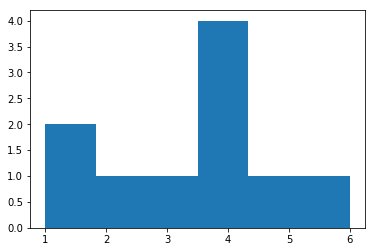

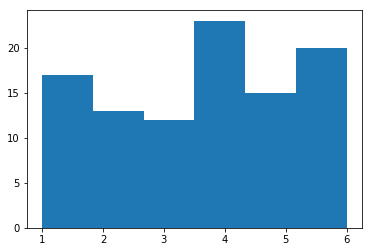

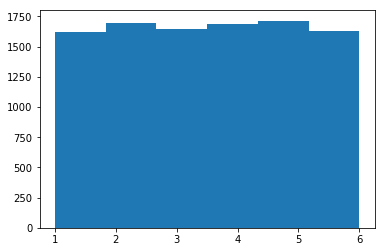

In [8]:
import matplotlib.pyplot as plt

# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

random.seed(1)
small_sample = [roll() for _ in range(10)]

# Plot a histogram with 6 bins (1 for each possible outcome of the die roll)
plt.hist(small_sample, 6)
plt.show()

random.seed(1)
small_sample = [roll() for _ in range(100)]
plt.hist(small_sample, 6)
plt.show()

random.seed(1)
small_sample = [roll() for _ in range(10000)]
plt.hist(small_sample, 6)
plt.show()

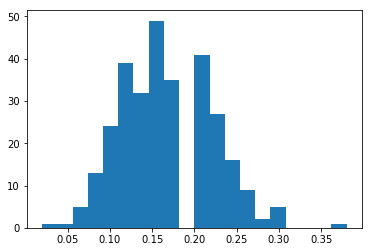

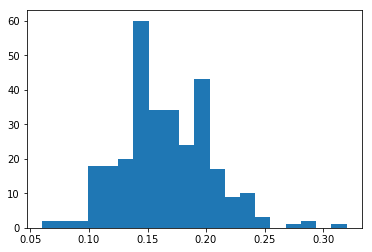

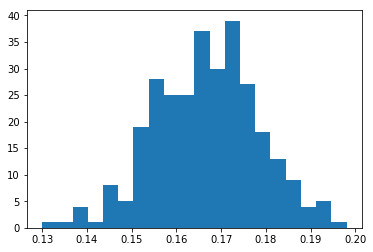

In [9]:
def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.show()

random.seed(1)
small_sample = probability_of_one(300, 100)
plt.hist(small_sample, 20)
plt.show()

random.seed(1)
small_sample = probability_of_one(300, 1000)
plt.hist(small_sample, 20)
plt.show()

31063.09385937003


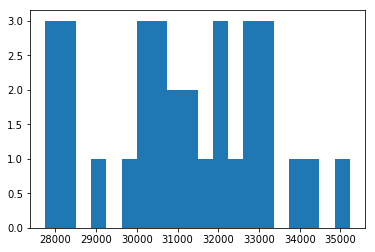

30786.139


In [10]:
# This is the mean median income in any US county.
mean_median_income = income["median_income"].mean()
print(mean_median_income)

def get_sample_mean(start, end):
    return income["median_income"][start:end].mean()

def find_mean_incomes(row_step):
    mean_median_sample_incomes = []
    # Iterate over the indices of the income rows
    # Starting at 0, and counting in blocks of row_step (0, row_step, row_step * 2, etc).
    for i in range(0, income.shape[0], row_step):
        # Find the mean median for the row_step counties from i to i+row_step.
        mean_median_sample_incomes.append(get_sample_mean(i, i+row_step))
    return mean_median_sample_incomes

nonrandom_sample = find_mean_incomes(100)
plt.hist(nonrandom_sample, 20)
plt.show()

# What you're seeing above is the result of biased sampling.
# Instead of selecting randomly, we selected counties that were next to each other in the data.
# This picked counties in the same state more often that not, and created means that didn't represent the whole country.
# This is the danger of not using random sampling -- you end up with samples that don't reflect the entire population.
# This gives you a distribution that isn't normal.

import random
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)

sample_income = select_random_sample(1000)

median_income = sample_income['median_income'].mean()
print(median_income)

sample_income['median_income'].hist(bins=20)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


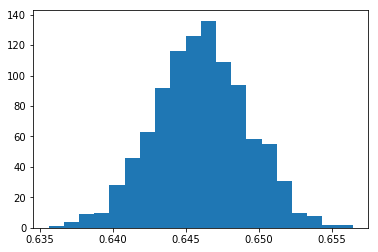

In [24]:
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)
mean_ratios = []
for i in range(1000):
    random_sample = select_random_sample(1000)
    random_sample['median_income_hs_college'] = random_sample['median_income_hs'] / random_sample['median_income_college']
    
    mean_ratios.append(random_sample['median_income_hs_college'].mean())

plt.hist(mean_ratios, 20)
plt.show()

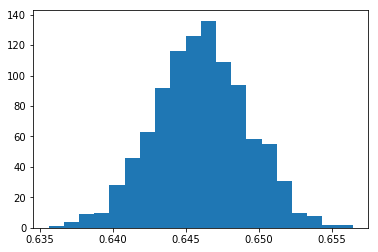

In [25]:
plt.hist(mean_ratios, 20)
plt.show()

In [26]:
import numpy as np
np.mean(mean_ratios)


0.64602840067501077

In [22]:
significance_value = None

count = 0
for r in mean_ratios:
    if r > 0.675:
        count += 1

significance_value = count / len(mean_ratios)
significance_value

0.014